In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_json("/content/drive/MyDrive/Datasets/structured/loan_approval_dataset.json")

In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [13]:
df = df.drop(["Id"],axis = 1)

In [5]:
df.isna().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


In [7]:
df.duplicated().sum()

0

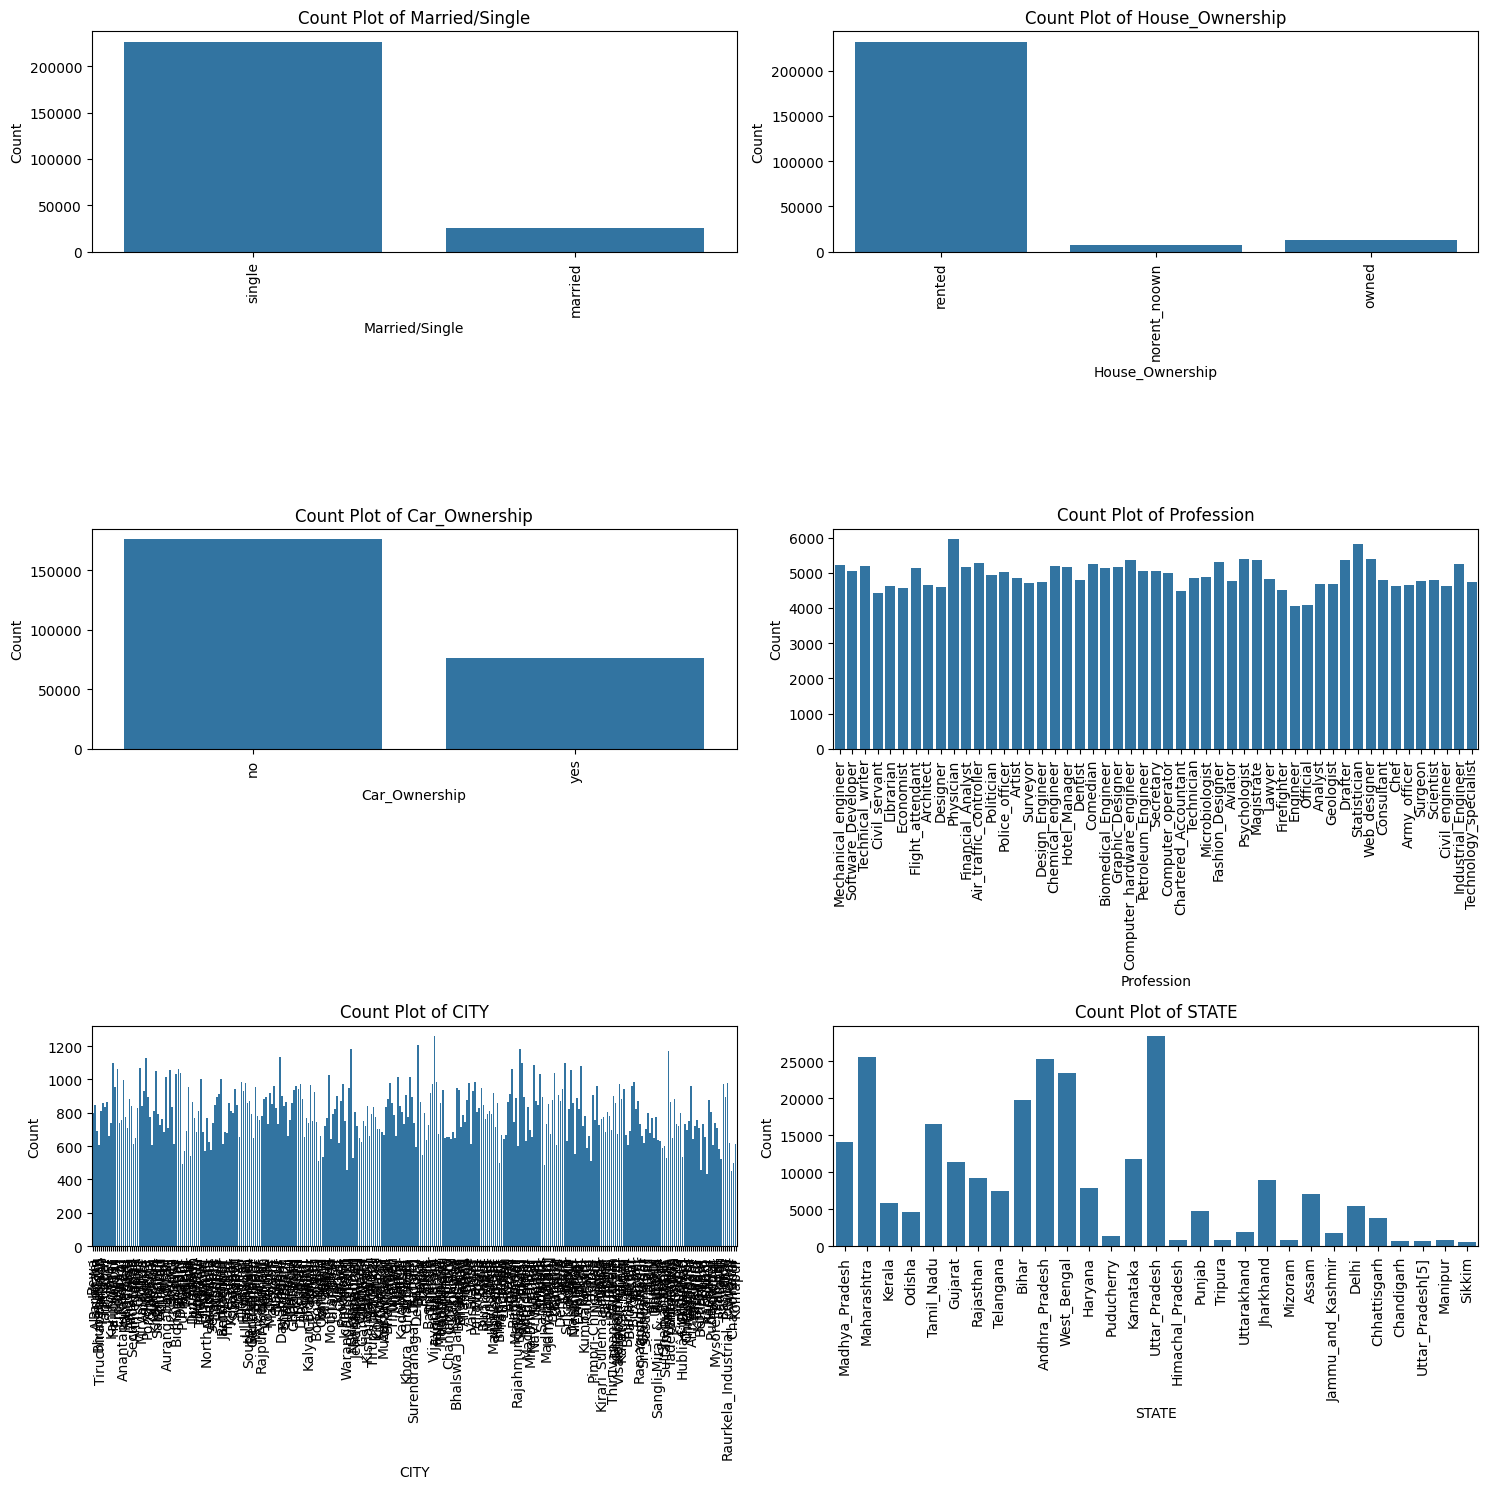

In [14]:
# Making count plots for the categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Generating count plots for each column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotating x-axis labels for better readability

plt.tight_layout()
plt.show()


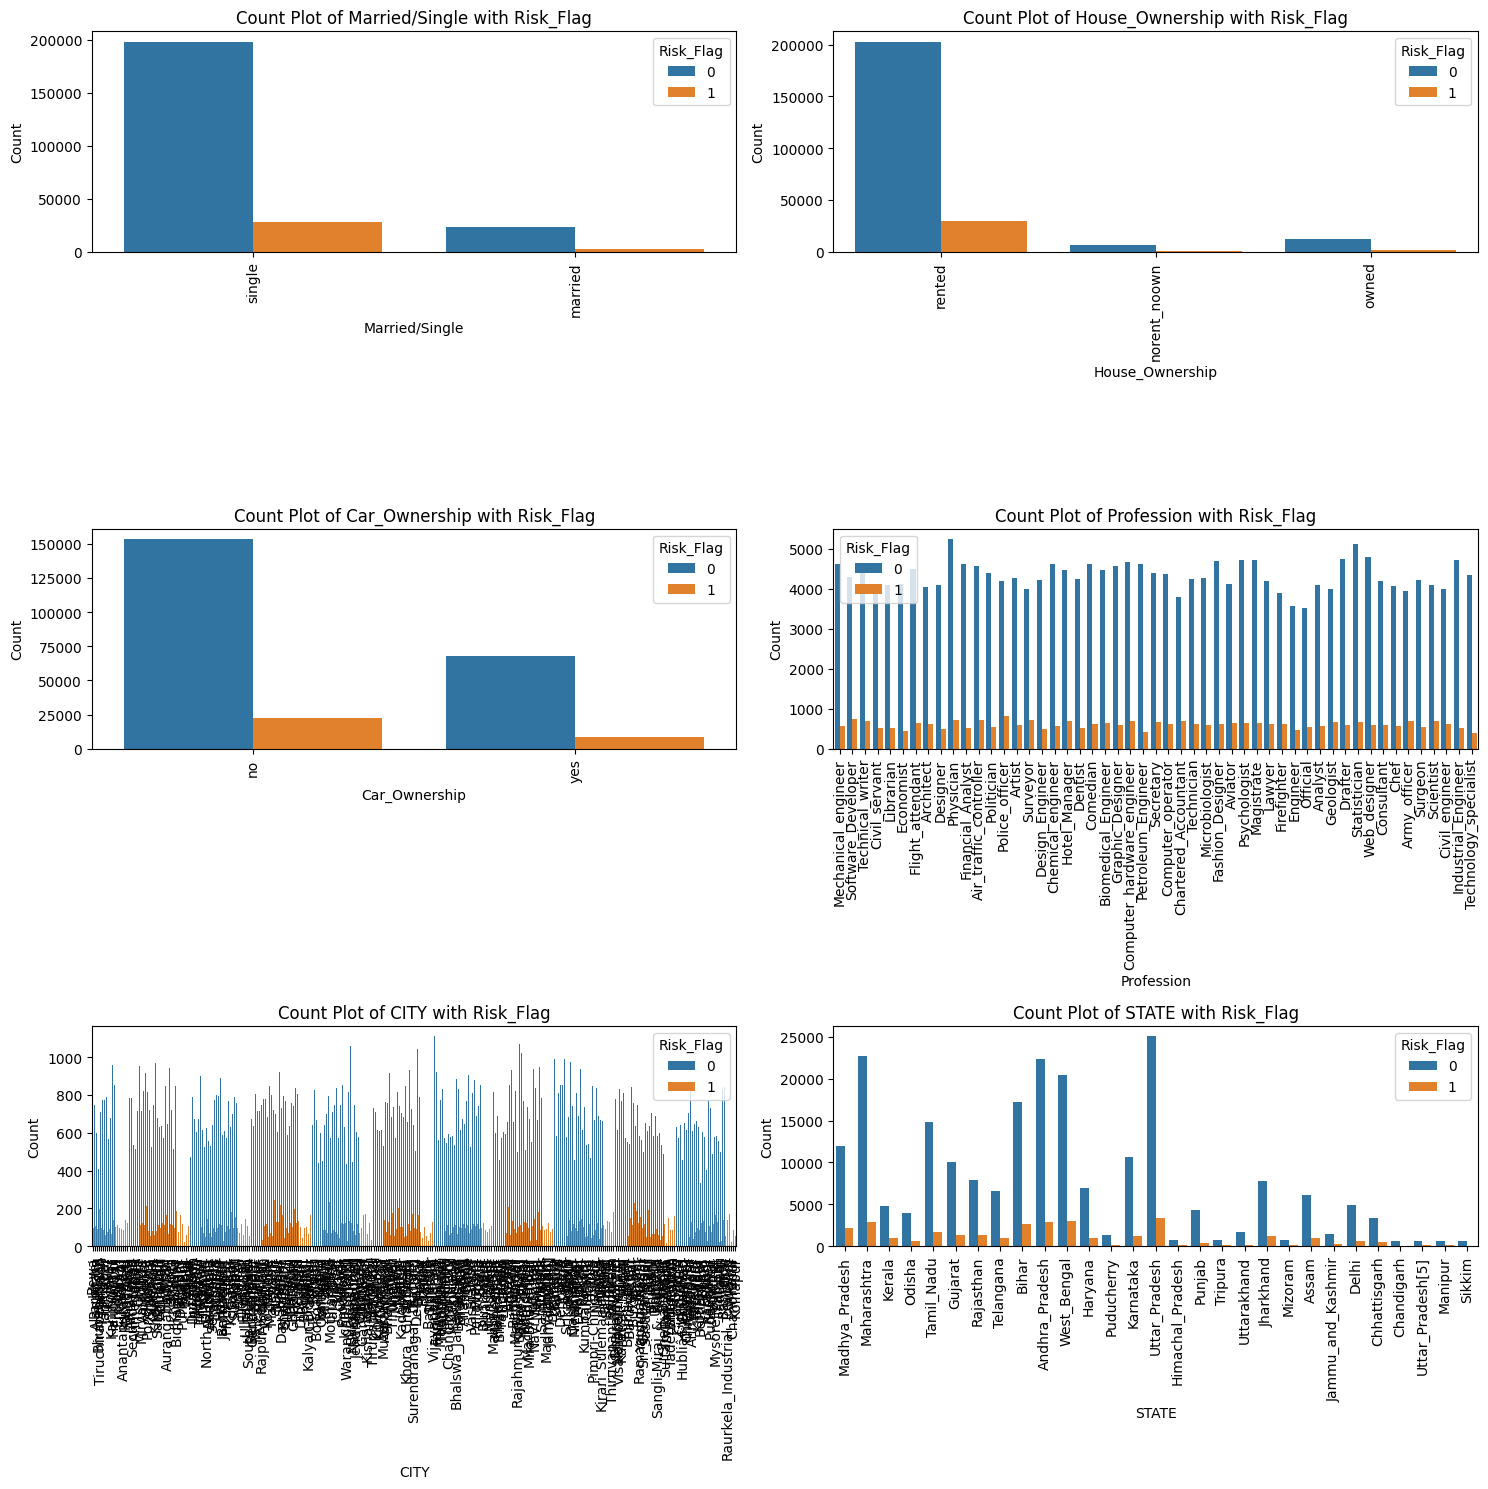

In [15]:
# Making count plots for the categorical columns with hue set to df.Risk_Flag
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# Set up the figure size and number of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Generate count plots for each column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Risk_Flag', ax=axes[i])
    axes[i].set_title(f'Count Plot of {col} with Risk_Flag')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


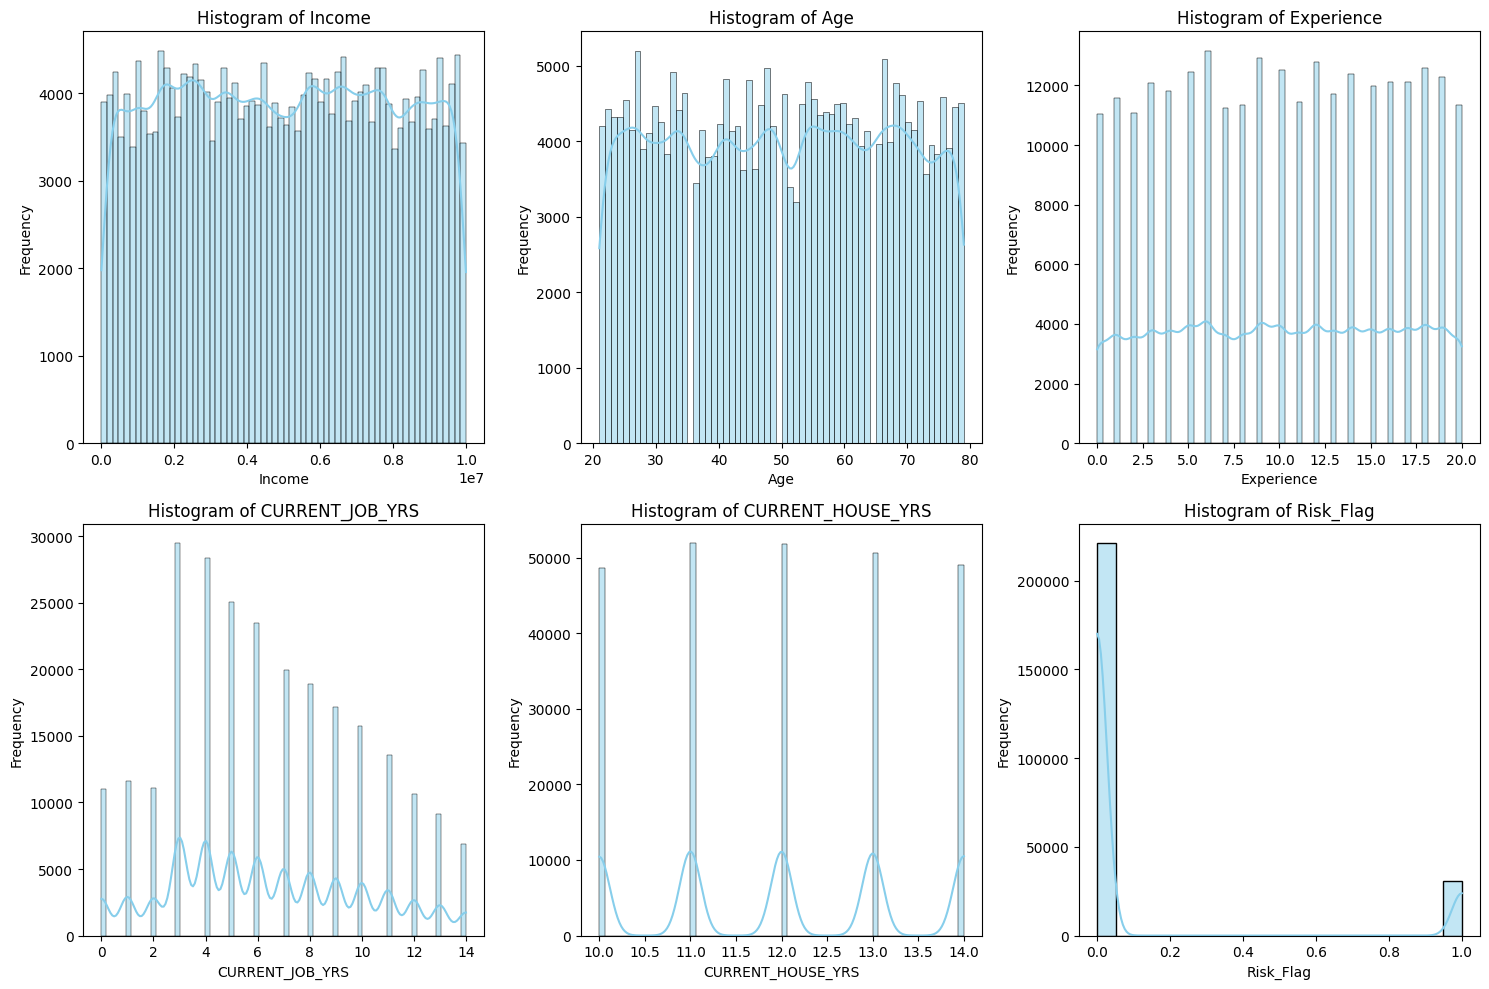

In [16]:
#Histograms of numerical columns

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=(len(numerical_columns) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(numerical_columns) + 2) // 3)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


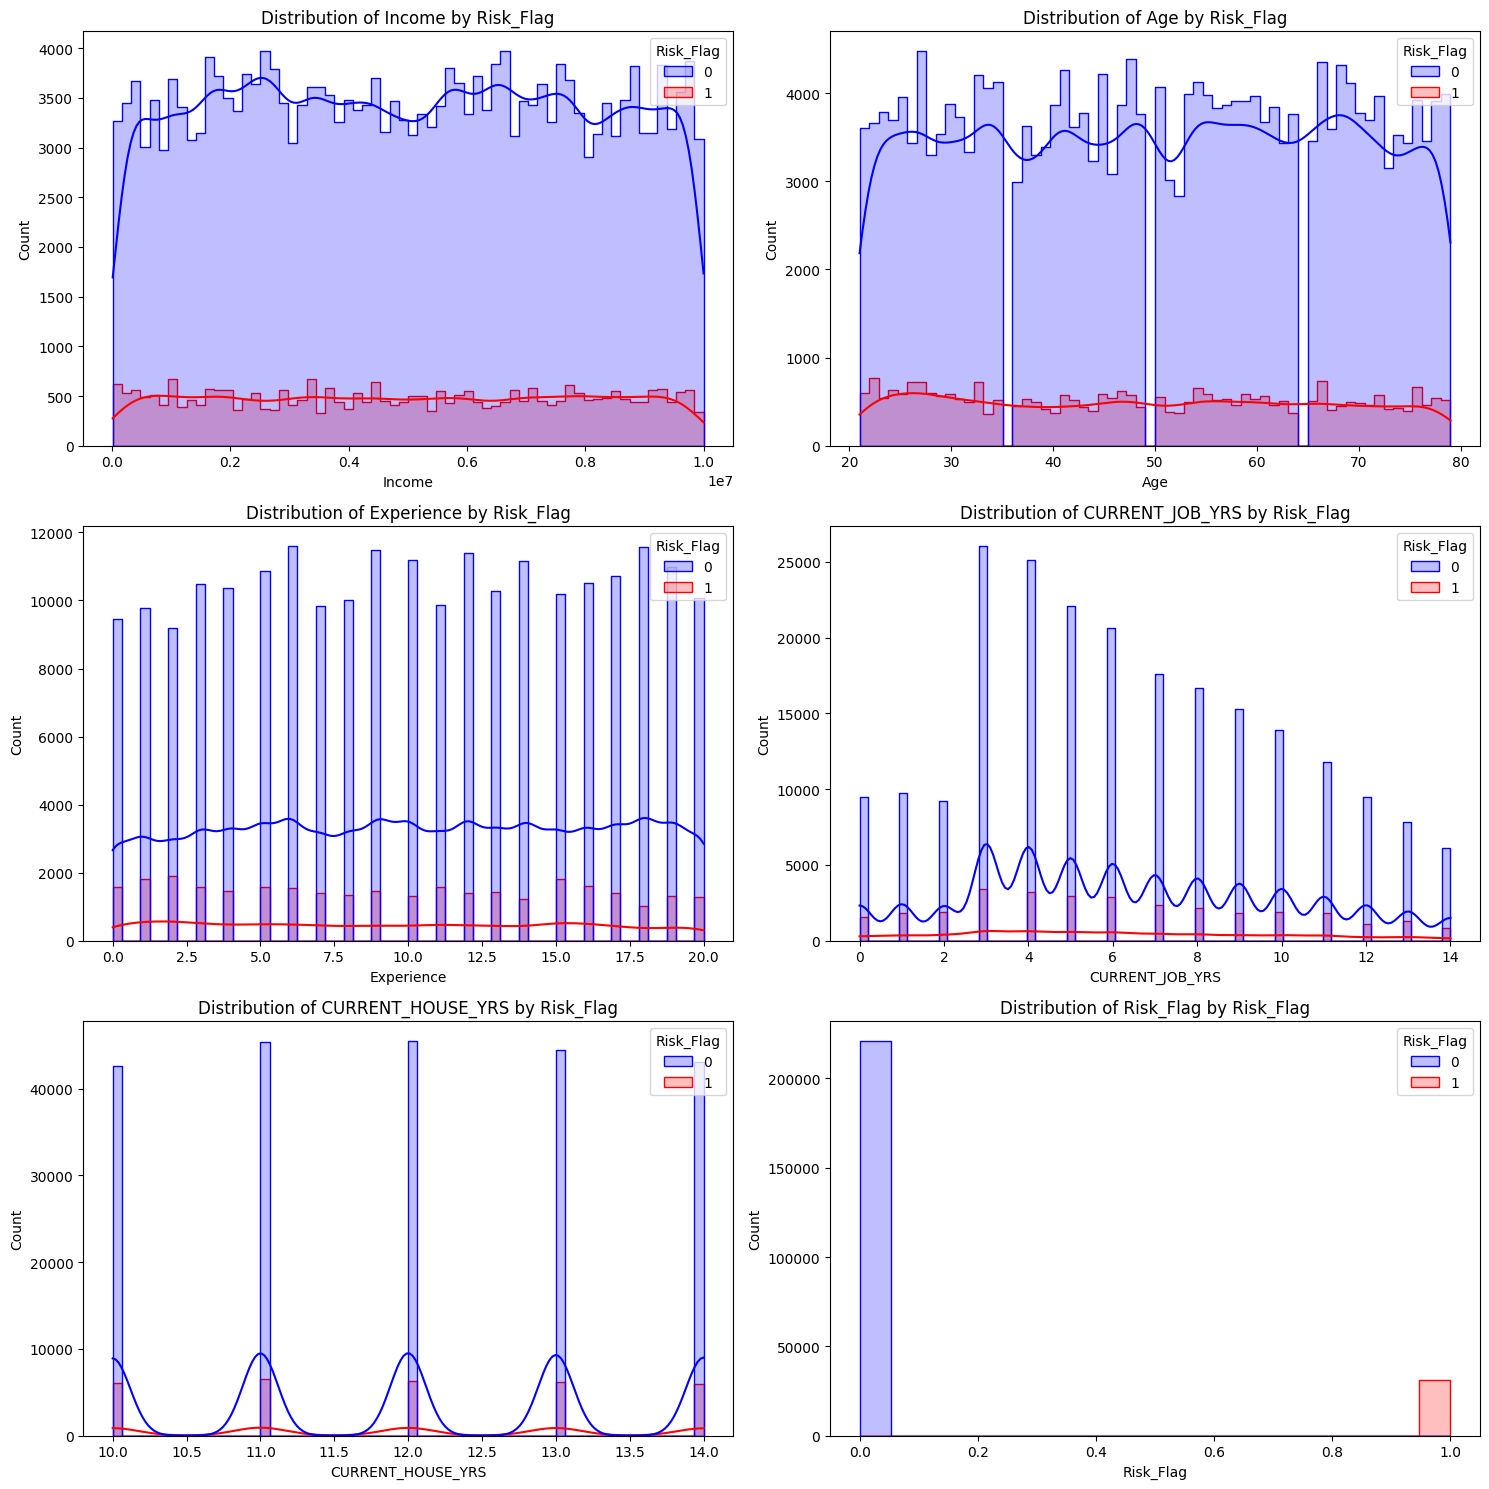

In [21]:
#Plotting above distributions wrt Risk_Flag
numerical_columns = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numerical_columns) // 2 + len(numerical_columns) % 2, ncols=2, figsize=(15, 15))
axes = axes.flatten()
#palette = {0: "#003f5c", 1: "#f95d6a"}
palette = {0: "blue", 1: "red"}
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, hue='Risk_Flag', kde=True, ax=axes[i], element="step", palette=palette)
    axes[i].set_title(f'Distribution of {col} by Risk_Flag')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [22]:
#The dataset is too large...lets obtain a subset of the dataset for experiments
df_subset = df.sample(n=10000, random_state=42)


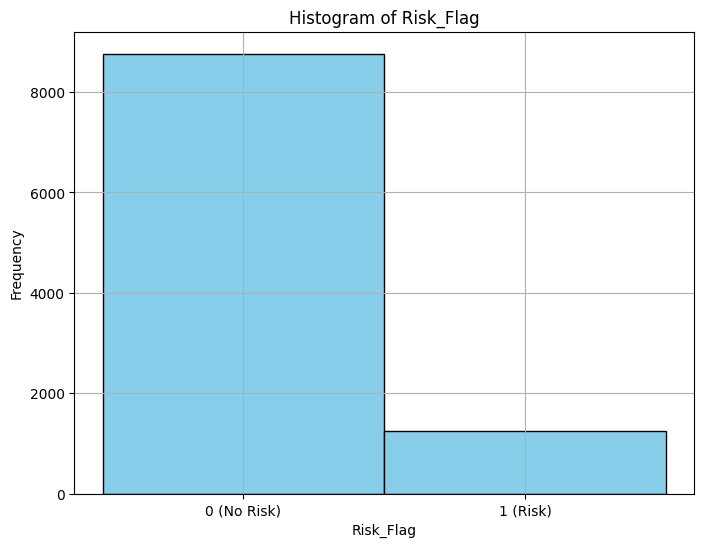

In [24]:
#Histogram of the Risk_Flag
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df_subset['Risk_Flag'], bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black')
plt.title('Histogram of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0 (No Risk)', '1 (Risk)'])
plt.grid(True)
plt.show()


In [25]:
#We see that the class imbalance has permeated to the subset of the dataset .... lets try
# the classifiers on this data before we implement smote

In [27]:
df_subset_dummies = pd.get_dummies(df_subset, dtype = int)
df_subset_dummies


,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
75255,4260981,47,18,7,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
192435,8529345,44,2,2,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154839,7848654,55,9,9,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59774,8491491,61,20,8,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
63788,1537266,78,13,9,12,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106142,2936137,25,13,13,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
172168,2400228,24,1,1,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103650,532746,78,18,10,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
178094,2302129,25,0,0,13,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df_subset_dummies.drop('Risk_Flag', axis=1)
y = df_subset_dummies['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Training classifiers and evaluating performance
results = {}
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Compute accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Print results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Accuracy  Precision    Recall
SVC                  0.876333   0.000000  0.000000
Decision Tree        0.845667   0.345638  0.277628
Logistic Regression  0.876333   0.000000  0.000000
Random Forest        0.882667   0.560510  0.237197
Naive Bayes          0.876333   0.000000  0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# We see that despite high accuracy, the Precision and Recall values have been
# an un-mitigated disaster. Now lets smote the living hell out of our dataset to
# make it mend its ways ;) :p :D

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Fit and resample the training data
X, y = smote.fit_resample(X, y)

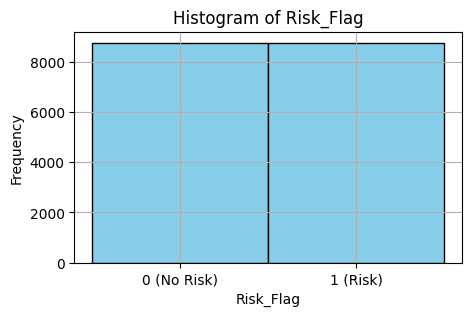

In [33]:
#Histogram of the Risk_Flag
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.hist(y, bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black')
plt.title('Histogram of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0 (No Risk)', '1 (Risk)'])
plt.grid(True)
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Training classifiers and evaluating performance
results = {}
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Compute accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Print results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Accuracy  Precision    Recall
SVC                  0.521491   0.564744  0.196964
Decision Tree        0.903385   0.913652  0.891461
Logistic Regression  0.498859   0.000000  0.000000
Random Forest        0.932864   0.966858  0.896774
Naive Bayes          0.510270   0.514272  0.410247


#The Precision and Recall values have signifcantly improved for Random Forest and Decision Tree